In [ ]:
# This notebook is to attempt Chinese datasets in Python
# to understand what functions work / don't work

In [ ]:
data_url = 'http://www.datashanghai.gov.cn/query!queryGdsDataInfoById.action?type=0&dataId=AC5002015050'

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
rrorig = pd.read_excel('1978年以来住宅投资和竣工建筑面积.xls', header=1, skip_footer=1)

# convert excel to dataframe, excluding non-data rows

rrorig.head()

,年 份,住宅投资额（亿元）,# 房地产,占全社会固定资产投资总额比重（%）,住宅竣工建筑面积（万平方米）,住宅建筑面积竣工率（%）
0,1978,2.67,NaN,9.6,199.61,NaN
1,1979,3.31,NaN,9.3,215.99,NaN
2,1980,5.82,NaN,12.8,304.32,NaN
3,1981,10.02,NaN,18.4,1380.70,78.3
4,1982,11.03,NaN,15.5,1363.63,77.7


In [4]:
rrorig.tail()

,年 份,住宅投资额（亿元）,# 房地产,占全社会固定资产投资总额比重（%）,住宅竣工建筑面积（万平方米）,住宅建筑面积竣工率（%）
34,2012,1457.64,1451.94,27.7,1626.73,19.5
35,2013,1626.95,1615.51,28.8,1439.20,17.6
36,2014,1730.81,1724.65,28.8,1549.64,18.1
37,2015,1822.73,1813.32,28.7,1617.86,19.2
38,2016,1979.85,1965.43,29.3,1557.98,19.1


In [5]:
# Translation of columns are as followed:

# 年  份 = Year
# 住宅投资额（亿元）= Residential investment (100 million yuan)
# # 房地产 = Number of properties
# 占全社会固定资产投资总额比重（%）= Real estate Accounted for the total fixed assets investment of the whole society
# 住宅竣工建筑面积（万平方米）= Residential completed construction area (10,000 square meters)
# 住宅建筑面积竣工率（%）= Residential building area completion rate

In [6]:
rrorig.columns

# we see that column naming is inconsistent, so will rename / shorten column names

Index(['年  份', '住宅投资额（亿元）', '# 房地产', '占全社会固定资产投资总额比重（%）', '住宅竣工建筑面积（万平方米）',
       '住宅建筑面积竣工率（%）'],
      dtype='object')

In [7]:
rredit = rrorig.rename(index=str, columns={"年  份": "年", "住宅投资额（亿元）": "住宅投资",
                                           "# 房地产": "房地产",
                                           "占全社会固定资产投资总额比重（%）": "投资比重",
                                           "住宅竣工建筑面积（万平方米）": "住宅面积",
                                           "住宅建筑面积竣工率（%）": "住宅工率"
                                          })

rredit.head()

,年,住宅投资,房地产,投资比重,住宅面积,住宅工率
0,1978,2.67,NaN,9.6,199.61,NaN
1,1979,3.31,NaN,9.3,215.99,NaN
2,1980,5.82,NaN,12.8,304.32,NaN
3,1981,10.02,NaN,18.4,1380.70,78.3
4,1982,11.03,NaN,15.5,1363.63,77.7


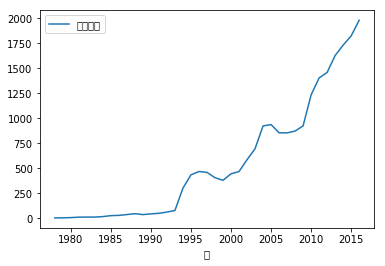

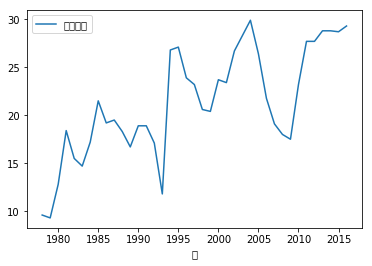

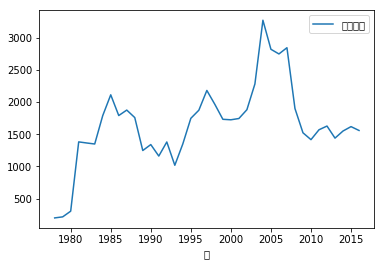

In [8]:
rredit.plot(x='年', y='住宅投资')
rredit.plot(x='年', y='投资比重')
rredit.plot(x='年', y='住宅面积')

# we can see that Chinese does not show up in graph labels

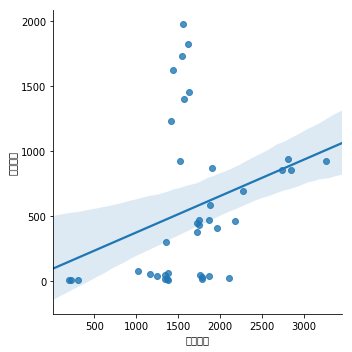

In [9]:
sns.lmplot(x='住宅面积', y='住宅投资', data=rredit)

# we can see that Chinese does not show up in Seaborn graph labels

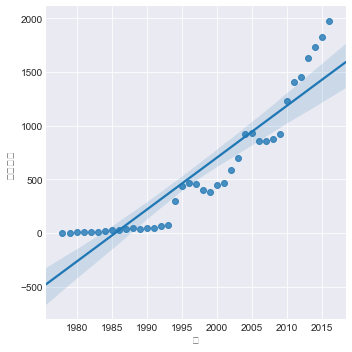

In [10]:
# attempt to enable Chinese labels


import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

sns.lmplot(x='年', y='住宅投资', data=rredit, aspect=1)

# unable to show Chinese font via Seaborn; will revisit

In [11]:
# will use English column titles for now

rredit = rredit.rename(index=str, columns={"年": "Year", "住宅投资": "Res Investment",
                                           "房地产": "Res Properties",
                                           "投资比重": "Res Investment Percentage",
                                           "住宅面积": "Res Size",
                                           "住宅工率": "Res Completion Rate"
                                          })

rredit.head(5)

,Year,Res Investment,Res Properties,Res Investment Percentage,Res Size,Res Completion Rate
0,1978,2.67,NaN,9.6,199.61,NaN
1,1979,3.31,NaN,9.3,215.99,NaN
2,1980,5.82,NaN,12.8,304.32,NaN
3,1981,10.02,NaN,18.4,1380.70,78.3
4,1982,11.03,NaN,15.5,1363.63,77.7


In [12]:
rrshort = rredit[['Year', 'Res Investment', 'Res Size']]

rrshort.head()

,Year,Res Investment,Res Size
0,1978,2.67,199.61
1,1979,3.31,215.99
2,1980,5.82,304.32
3,1981,10.02,1380.70
4,1982,11.03,1363.63


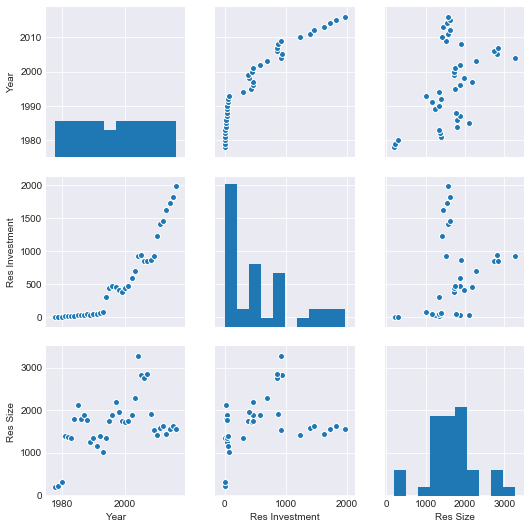

In [13]:
sns.pairplot(rrshort)

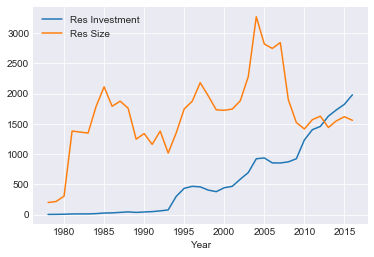

In [16]:
rrshort.plot(x='Year')

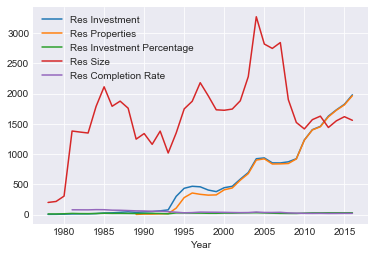

In [26]:
rredit.plot(x='Year')

In [ ]:
# Will revisit